In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from skimage.io import imread
from skimage.transform import resize,rescale
from tqdm import tqdm_notebook

In [4]:
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense,BatchNormalization,Conv2D,Conv2DTranspose,LeakyReLU,Flatten,Dropout,Reshape,Input
from tensorflow.keras.models import Model

In [5]:
!mkdir /content/gan_images/
!mkdir /content/weights/

In [6]:
!cp /content/drive/MyDrive/"Colab Notebooks"/data.zip /content/

In [7]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
 extracting: data/5499.png           
  inflating: data/55.png             
 extracting: data/550.png            
 extracting: data/5500.png           
 extracting: data/5501.png           
 extracting: data/5502.png           
 extracting: data/5503.png           
 extracting: data/5504.png           
 extracting: data/5505.png           
 extracting: data/5506.png           
 extracting: data/5507.png           
 extracting: data/5508.png           
 extracting: data/5509.png           
 extracting: data/551.png            
 extracting: data/5510.png           
 extracting: data/5511.png           
 extracting: data/5512.png           
 extracting: data/5513.png           
 extracting: data/5514.png           
 extracting: data/5515.png           
 extracting: data/5516.png           
 extracting: data/5517.png           
 extracting: data/5518.png           
 extracting: data/5519.png           
 extracting: data/552.png            

In [8]:
def generator_model(latent_space,channels):
  i = Input(shape = (latent_space))

  x = Dense(128 * 32 * 32)(i)       
  x = LeakyReLU()(x)
  x = Reshape((32, 32, 128))(x)
  #out_dim : 32 x 32 x 128

  x = Conv2D(256, 5, padding = "same")(x)
  x = LeakyReLU()(x)
  #out_dim : 32 x 32 x 256

  x = Conv2DTranspose(256, 4, strides = 2, padding = "same")(x)
  x = LeakyReLU()(x)
  #out_dim : 64 x 64 x 256

  x = Conv2D(256, 5, padding = "same")(x)
  x = LeakyReLU()(x)
  x = Conv2D(256, 5, padding = "same")(x)
  x = LeakyReLU()(x)
  #out_dim : 64 x 64 x 256

  x = Conv2D(channels, 7, activation = "tanh", padding = "same")(x)
  #out_dim : 64 x 64 x 3
  model = Model(i, x, name = "generator")
  return model

In [9]:
def discriminator_model(img_size):
  i = Input(shape = img_size)
  x = Conv2D(128, 3)(i)
  x = LeakyReLU()(x)
  # out_dim : 62 x 62 x128

  x = Conv2D(128, 4, strides = 2)(x)
  x = LeakyReLU()(x)
  # out_dim : 30 x 30 x 128 

  x = Conv2D(128, 4, strides = 2)(x)
  x = LeakyReLU()(x)
  # out_dim : 14 x 14 x 128 

  x = Conv2D(128, 4, strides = 2)(x)
  x = LeakyReLU()(x)
  x = Flatten()(x)
  # out_dim : 1 x 4608

  x = Dropout(0.4)(x)

  x = Dense(1, activation = "sigmoid")(x)

  model = Model(i,x,name = "discriminator")
  return model

In [10]:
H,W,D = 64,64,3
latent_space = 100

In [11]:
dis = discriminator_model(img_size = (H,W,D))
gen = generator_model(latent_space,D)

dis_opti = RMSprop(lr = 0.0005, clipvalue = 1.0, decay = 1e-8)
dis.compile(optimizer = dis_opti, loss = "binary_crossentropy")

dis.trainable = False

gan_in = Input(shape = (latent_space,))
gan_out = dis(gen(gan_in))
c_model = Model(gan_in,gan_out)

gan_opti = RMSprop(lr = 0.0005, clipvalue = 1.0, decay = 1e-8)
c_model.compile(optimizer = gan_opti, loss = "binary_crossentropy")

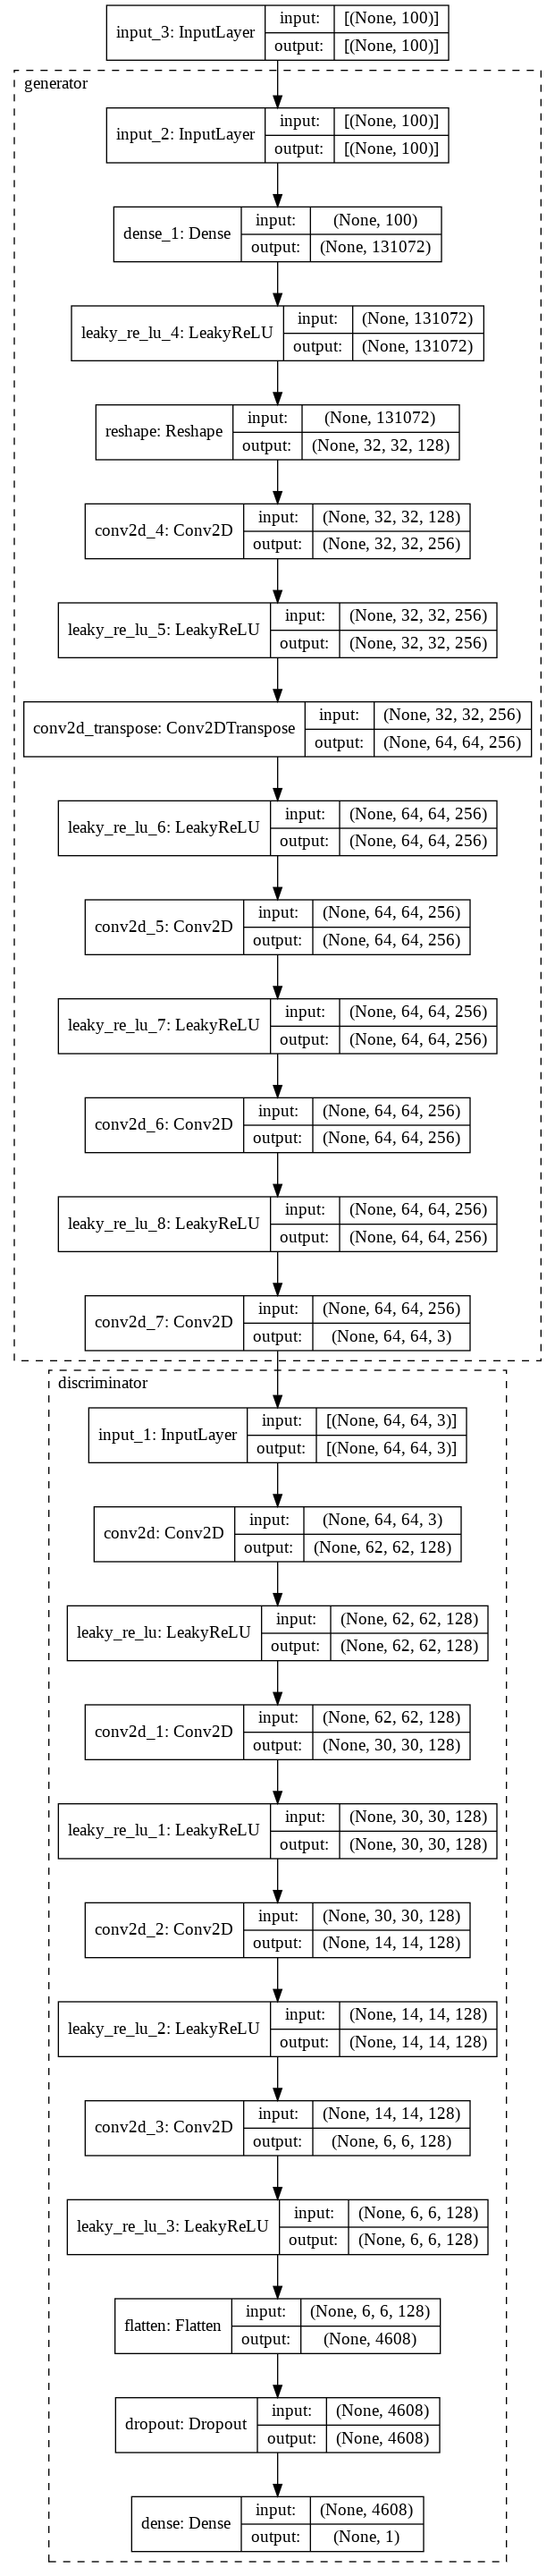

In [12]:
tensorflow.keras.utils.plot_model(c_model, show_shapes = True, expand_nested = True)

In [13]:
from glob import glob
file_list = glob("/content/data/*")
x_train = np.array([resize(imread(filename),(H,W)) for filename in file_list])

In [14]:
x_train.shape

(21551, 64, 64, 3)

In [15]:
g_losses = []
d_losses = []

In [16]:
epochs = 5000
batch_size = 64
index = 0
step = 0

In [17]:
#(out * 255).astype(np.uint8)

In [18]:
def sample_imgs(epoch):
  rows,cols = 5,5
  noise = np.random.normal(size = (rows*cols,latent_space))
  gen_imgs = gen.predict(noise)
  fig,axes = plt.subplots(rows,cols)
  index = 0
  for i in range(rows):
    for j in range(cols):
      temp_img = resize(gen_imgs[index],(H,W))
      axes[i,j].imshow((temp_img*255).astype("uint8"))
      axes[i,j].axis("off")
      index = index + 1
  plt.show()
  plt.savefig(f"/content/gan_images/gan_{epoch}.png")

Epoch : 1/5000  discriminator_loss : 0.6759661436080933 generator_loss : 0.690413773059845 dev_note: 💔 this is taking long ffs 💔


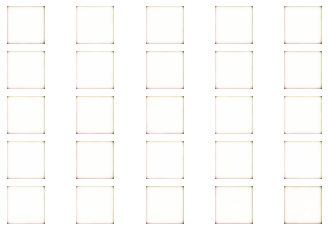

super_rare_find UwU Weights saved!
Step : 1 done! 
Epoch : 501/5000  discriminator_loss : 0.669643223285675 generator_loss : 1.2008047103881836 dev_note: 💔 this is taking long ffs 💔


<Figure size 432x288 with 0 Axes>

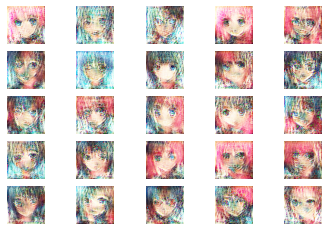

Step : 2 done! 
Epoch : 1001/5000  discriminator_loss : 0.6814460754394531 generator_loss : 0.7053543329238892 dev_note: 💔 this is taking long ffs 💔


<Figure size 432x288 with 0 Axes>

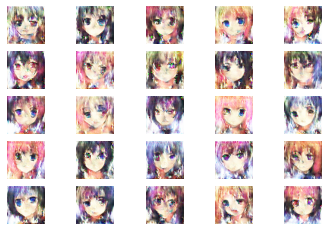

Step : 3 done! 
Step : 4 done! 
Epoch : 1501/5000  discriminator_loss : 0.7318103313446045 generator_loss : 0.7298455834388733 dev_note: 💔 this is taking long ffs 💔


<Figure size 432x288 with 0 Axes>

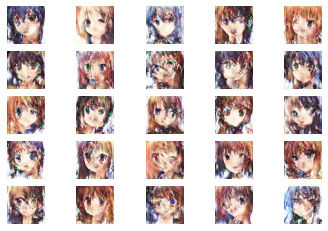

Step : 5 done! 
Epoch : 2001/5000  discriminator_loss : 0.6691644787788391 generator_loss : 1.061772108078003 dev_note: 💔 this is taking long ffs 💔


<Figure size 432x288 with 0 Axes>

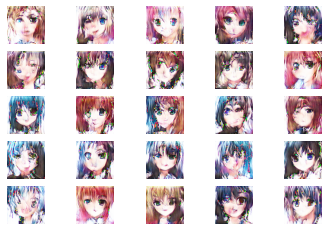

Step : 6 done! 
Step : 7 done! 
Epoch : 2501/5000  discriminator_loss : 0.4815666675567627 generator_loss : 2.8113346099853516 dev_note: 💔 this is taking long ffs 💔


<Figure size 432x288 with 0 Axes>

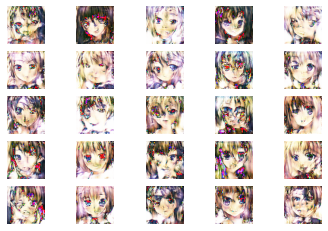

Step : 8 done! 
Epoch : 3001/5000  discriminator_loss : 0.6481874585151672 generator_loss : 0.9439038038253784 dev_note: 💔 this is taking long ffs 💔


<Figure size 432x288 with 0 Axes>

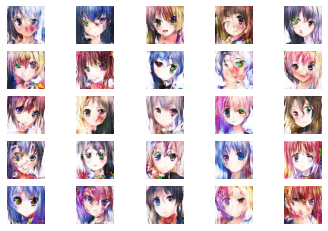

Step : 9 done! 
Step : 10 done! 
Epoch : 3501/5000  discriminator_loss : 0.5661911964416504 generator_loss : 0.8953505754470825 dev_note: 💔 this is taking long ffs 💔


<Figure size 432x288 with 0 Axes>

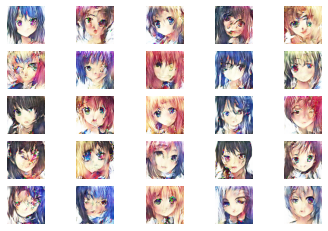

Step : 11 done! 
Epoch : 4001/5000  discriminator_loss : 0.32798993587493896 generator_loss : 5.8238205909729 dev_note: 💔 this is taking long ffs 💔


<Figure size 432x288 with 0 Axes>

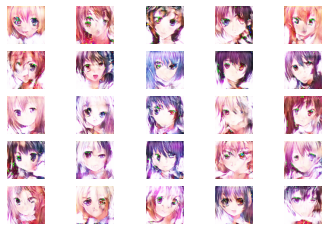

Step : 12 done! 
Step : 13 done! 
Epoch : 4501/5000  discriminator_loss : 0.6403182744979858 generator_loss : 1.4376521110534668 dev_note: 💔 this is taking long ffs 💔


<Figure size 432x288 with 0 Axes>

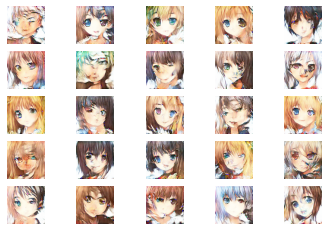

Step : 14 done! 


<Figure size 432x288 with 0 Axes>

In [19]:
for epoch in range(epochs):
  #---------------preprocessing--------------------#
  noise = np.random.normal(size = (batch_size,latent_space))

  fake_imgs = gen.predict(noise)
  real_imgs = x_train[index : index + batch_size]

  com_imgs = np.concatenate([fake_imgs,real_imgs])
  labels = np.concatenate([np.ones((batch_size,1)),np.zeros((batch_size,1))])

  labels += 0.05 * np.random.random(labels.shape)

  #---------------train discriminator---------------#
  d_loss = dis.train_on_batch(com_imgs, labels)

  #---------------train generator-------------------#
  noise = np.random.normal(size = (batch_size,latent_space))
  f_labels = np.zeros((batch_size,1))
  g_loss = c_model.train_on_batch(noise,f_labels)

  #=====-----some logging-----=====#
  index = index + batch_size
  g_losses.append(g_loss)
  d_losses.append(d_loss)
  #====---reset limit---====#

  if index > len(x_train) - batch_size:
    step = step+ 1
    print(f"Step : {step} done! ")
    index = 0
  #====---some more logging and saving checkpoints---====#
  if epoch % 500 == 0:
    print(f"Epoch : {epoch+1}/{epochs}  discriminator_loss : {d_loss} generator_loss : {g_loss} dev_note: 💔 this is taking long ffs 💔")
    sample_imgs(epoch)

  if epoch % 10000 == 0:
    c_model.save_weights(f"/content/weights/gan_weigths_{epoch}.h5")
    print(f"super_rare_find UwU Weights saved!")

In [20]:
gen.save("gen_20000.tf")

INFO:tensorflow:Assets written to: gen_20000.tf/assets


In [21]:
gen.save_weights(f"/content/weights/gen_weigths_15000.h5")

In [22]:
c_model.save_weights(f"/content/weights/gan_weights_15000.h5")

In [23]:
dis.save_weights(f"/content/weights/dis_weights_15000.h5")

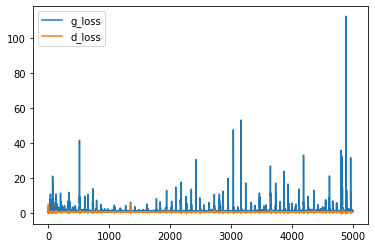

In [24]:
plt.plot(g_losses,label = "g_loss")
plt.plot(d_losses, label = "d_loss")
plt.legend()

In [25]:
def view_img(noise):
  pred = gen.predict(noise)
  pred = resize(pred[0],(64,64))
  plt.imshow((pred*255).astype("uint8"))

In [26]:
from PIL import Image
fp_in = "/content/gan_images/*"
fp_out = "/content/anime_morph.gif"
img, *imgs = [Image.open(f) for f in sorted(glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,save_all=True, duration=100, loop=1)

In [27]:
noise = np.random.normal(size = (1,latent_space))


![](/content/anime_morph.gif)

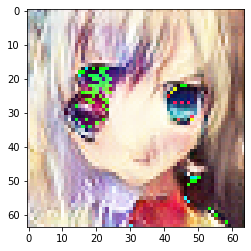

In [28]:
view_img(noise)

In [29]:
noise

array([[ 0.96935717, -0.17406775,  1.26623898, -1.33213094, -0.69921107,
        -0.58830514,  0.32013947,  0.6773896 ,  0.75474031,  0.33684641,
         1.41542174,  0.28483019, -0.25991264, -0.03140915, -0.33080961,
         2.50879477, -0.50788027, -0.34808296, -0.13364995, -0.22184611,
         1.32525948,  0.47453041,  0.56773909,  0.5849687 ,  1.19547028,
        -1.42208685, -0.79496779, -1.38234083,  1.22955273, -0.34738406,
        -0.4513789 , -0.79483658,  0.27807529,  1.03389741,  1.47302574,
         1.4182179 ,  0.9050637 ,  1.72308402,  1.25094174,  0.92084131,
         1.44869754, -1.40593642,  1.20932686,  0.52505103, -0.3163127 ,
         0.52018506, -1.06578105,  0.19174159,  1.32661915,  2.69108488,
         0.11357291, -0.55603783,  0.40054129, -0.53864217, -0.20389628,
        -0.073394  ,  0.46881892,  0.38547525, -1.41950698, -0.96706624,
         0.93431934,  2.28473355, -0.36396305, -1.95891614,  1.25264297,
         1.02962386, -1.63898447, -0.32685867,  1.6

In [30]:
def view_img_grid(noise):
  rows,cols = 5,5

  gen_imgs = gen.predict(noise)
  fig,axes = plt.subplots(rows,cols,figsize = (8,8))
  index = 0
  for i in range(rows):
    for j in range(cols):
      temp_img = resize(gen_imgs[index],(H,W))
      axes[i,j].imshow((temp_img*255).astype("uint8"))
      axes[i,j].axis("off")
      index = index + 1
  plt.show()

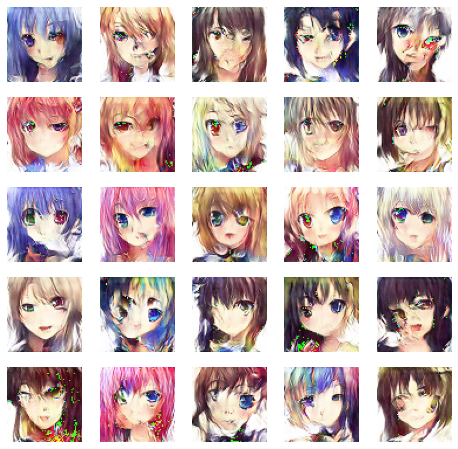

In [31]:
noise_fam = np.random.normal(size = (25,latent_space))
view_img_grid(noise_fam)

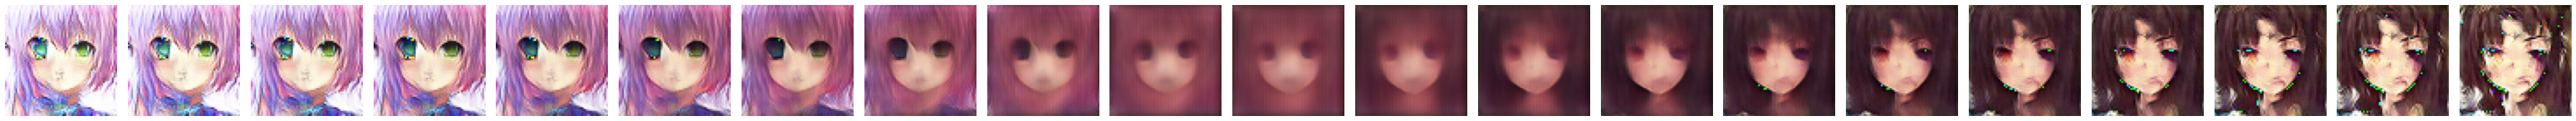

In [32]:
means = -1
count = 0
fig, axes = plt.subplots(1, 21, gridspec_kw = {'wspace':0.1, 'hspace':0.1}, figsize=(64,64))
while means < 1 :
  random_latent_vectors = np.random.normal(size = (16, latent_space), loc=means, 
                                         scale=0.0)
  random_latent_vectors = random_latent_vectors.mean(axis=0)
  generated_images = gen.predict(np.array([random_latent_vectors]))
  axes[count].set_xticklabels([])
  axes[count].set_yticklabels([])
  temp_img = resize(generated_images[0],(H,W))
  axes[count].imshow((generated_images[0]*255).astype("uint8"))
  axes[count].axis('off')
  means += 0.1
  count+= 1
plt.show()

In [33]:
-1 +(0.1 * 6)

-0.3999999999999999

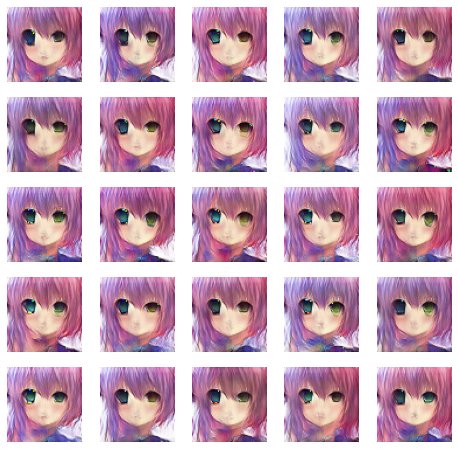

In [34]:
noise_1 = np.random.normal(size = (25, latent_space), loc=-0.5,scale = 0.2)
view_img_grid(noise_1)

In [36]:
gen.save("generaor")

INFO:tensorflow:Assets written to: generaor/assets


In [37]:
!zip -r /content/gen_final.zip /content/generaor/

  adding: content/generaor/ (stored 0%)
  adding: content/generaor/variables/ (stored 0%)
  adding: content/generaor/variables/variables.index (deflated 57%)
  adding: content/generaor/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/generaor/saved_model.pb (deflated 90%)
  adding: content/generaor/assets/ (stored 0%)
